C:\Users\usuario\AppData\Local\Temp\ipykernel_6132\2630667117.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("defunciones_filtradas.csv")


Accuracy: 0.60
              precision    recall  f1-score   support

        E149       0.48      0.42      0.45     10038
        I219       0.60      0.67      0.64     18579
        J189       0.67      0.63      0.65     14100

    accuracy                           0.60     42717
   macro avg       0.59      0.57      0.58     42717
weighted avg       0.60      0.60      0.60     42717

70/30 - Accuracy: 0.60
              precision    recall  f1-score   support

        E149       0.48      0.42      0.45     10038
        I219       0.60      0.67      0.64     18579
        J189       0.67      0.63      0.65     14100

    accuracy                           0.60     42717
   macro avg       0.59      0.57      0.58     42717
weighted avg       0.60      0.60      0.60     42717

Accuracy: 0.60
              precision    recall  f1-score   support

        E149       0.49      0.42      0.45      6711
        I219       0.60      0.68      0.64     12316
        J189       0.6

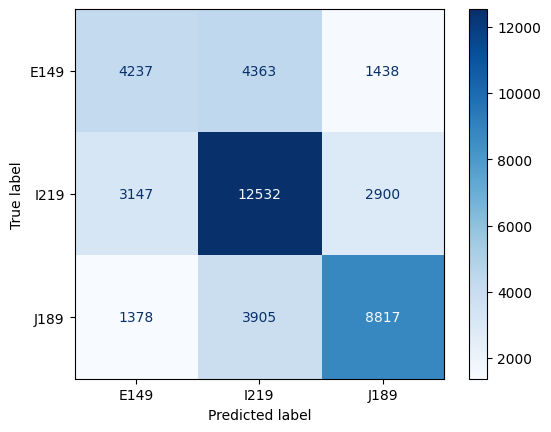

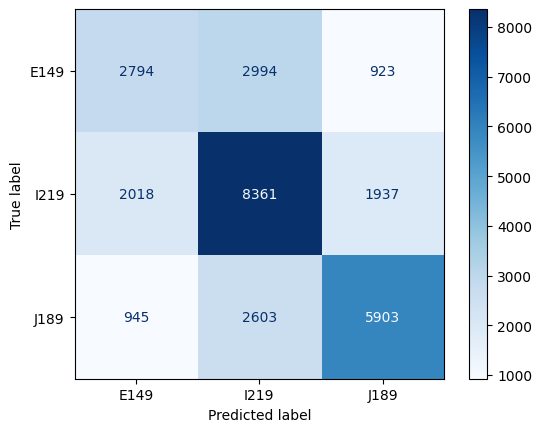

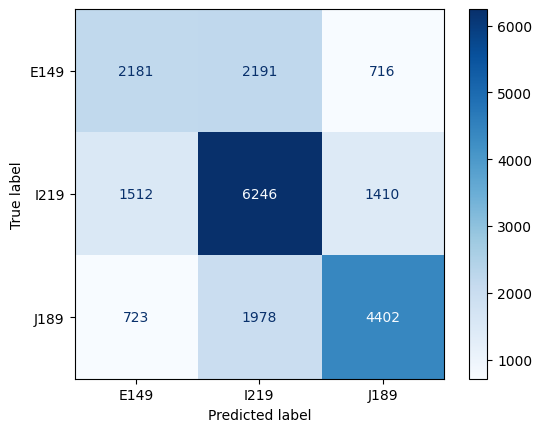

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Cargar el dataset
df = pd.read_csv("defunciones_filtradas.csv")

# 2. Nombre de la columna objetivo
target_col = "causa"

# 3. Preprocesamiento
X = df.drop(columns=[target_col], errors="ignore")
y = df[target_col]

# Codificar variables categóricas
X = pd.get_dummies(X)

# Rellenar NaNs con 0
X = X.fillna(0)

# Codificar la columna objetivo
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Escalar variables (opcional para RandomForest, pero puedes dejarlo si ya lo tienes hecho)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def entrenar_random_forest(X_train, X_test, y_train, y_test):
    modelo = RandomForestClassifier(n_estimators=100, random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    print(f"Accuracy: {acc:.2f}")
    print(report)
    mostrar_matriz_confusion(y_test, y_pred, le.classes_)
    return acc, report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def mostrar_matriz_confusion(y_test, y_pred, clases):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clases)
    disp.plot(cmap='Blues', values_format='d')

# 5. Partición 70/30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_scaled, y_encoded, test_size=0.30, random_state=42)
acc_70, report_70 = entrenar_random_forest(X_train_70, X_test_70, y_train_70, y_test_70)
print(f"70/30 - Accuracy: {acc_70:.2f}")
print(report_70)

# 6. Partición 80/20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_scaled, y_encoded, test_size=0.20, random_state=42)
acc_80, report_80 = entrenar_random_forest(X_train_80, X_test_80, y_train_80, y_test_80)
print(f"80/20 - Accuracy: {acc_80:.2f}")
print(report_80)

# 7. Partición 85/15
X_train_85, X_test_85, y_train_85, y_test_85 = train_test_split(X_scaled, y_encoded, test_size=0.15, random_state=42)
acc_85, report_85 = entrenar_random_forest(X_train_85, X_test_85, y_train_85, y_test_85)
print(f"85/15 - Accuracy: {acc_85:.2f}")
print(report_85)


Siendo:

- E149 -- Diabetes
- I219 -- Infarto
- J189 -- Neumonía